In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2.5
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,2.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1.0


In [8]:
df.shape

(1460, 82)

In [6]:
# check duplicates
df.duplicated().sum()

0

In [32]:
# Check the missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing}")

Missing values per column:
Series([], dtype: int64)

Total number of missing values: 0


In [34]:
#Handling Missing Values
def clean_all_missing(df):
    # Fill numerical columns with median
    num_cols_to_fill = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    for col in num_cols_to_fill:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)

    # Fill categorical columns with mode
    cat_cols_with_mode = ['MasVnrType', 'Electrical']
    for col in cat_cols_with_mode:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Fill  categorical columns with "None"
    cat_cols_with_none = [
        'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
    ]
    for col in cat_cols_with_none:
        if col in df.columns:
            df[col].fillna('None', inplace=True)

    return df


In [35]:
total_missing = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing}")


Total number of missing values: 0


In [36]:
X = df[["GrLivArea", "BedroomAbvGr", "TotalBath"]]
y = df["SalePrice"]


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Model Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Intercept: 56862.577516079706
RMSE: 53,371.56
R² Score: 0.6286


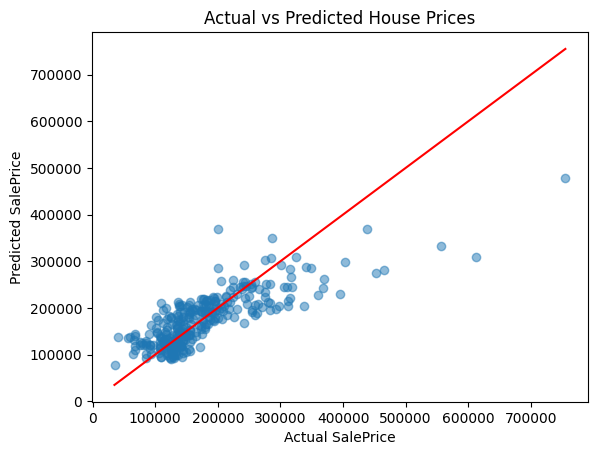

In [42]:
#Visualize Predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Perfect prediction line
plt.show()
